<a href="https://www.kaggle.com/parisrohan/kaggle-house-price-prediction?scriptVersionId=89512127" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/kaggle-house-price-prediction/__results__.html
/kaggle/input/kaggle-house-price-prediction/submission.csv
/kaggle/input/kaggle-house-price-prediction/__resultx__.html
/kaggle/input/kaggle-house-price-prediction/__notebook__.ipynb
/kaggle/input/kaggle-house-price-prediction/__output__.json
/kaggle/input/kaggle-house-price-prediction/custom.css
/kaggle/input/kaggle-house-price-prediction/__results___files/__results___67_1.png


In [2]:
#load train dataset
df_train=pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#load test dataset
df_test=pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

**Train** data has 1460 rows and 81 columns AND 
**Test** data has 1459 rows and 80 columns

In [5]:
#combine train and test data for data preprocessing
df_merge=pd.concat([df_test.assign(ind="test"), df_train.assign(ind="train")])
df_merge.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [6]:
df_merge.shape

(2919, 82)

In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
df_merge.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#Get categorical and numerical columns
categorical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes=='object']
numerical_cols=[cname for cname in df_merge.columns if df_merge[cname].dtypes!='object']

# Data Cleaning

In [10]:
#Function to get count of missing values in each column
def get_cols_with_missing_values(DataFrame):
    missing_na_columns=(DataFrame.isnull().sum())
    return missing_na_columns[missing_na_columns > 0]

In [11]:
#Categorical features that have missing values
print(get_cols_with_missing_values(df_merge[categorical_cols]))

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


**For the below categorical features, we will create a new category by replacing the null value with keyword 'Not Applicable'**

1. Alley: Type of alley access to property ->
       Grvl 	Gravel
       Pave 	Paved
       NA	No alley access 


2. BsmtQual: Evaluates the height of the basement
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
  
  
3. BsmtCond: Evaluates the general condition of the basement
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement


4. BsmtExposure: Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


5. BsmtFinType1: Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


6. BsmtFinType2: Rating of basement finished area (if multiple types)
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


7. FireplaceQu: Fireplace quality
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
8. GarageType: Garage location	
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
       
9. GarageFinish: Interior finish of the garage
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage


10. GarageQual: Garage quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


11. GarageCond: Garage condition
      Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       


12. PoolQC: Pool quality
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


13. Fence: Fence quality
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence


14. MiscFeature: Miscellaneous feature not covered in other categories
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [12]:
df_merge_clean = df_merge.copy()
df_merge_clean.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ind,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,test,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,test,NaN


In [13]:
df_merge.shape, df_merge_clean.shape

((2919, 82), (2919, 82))

In [14]:
NA_Features=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
df_merge_clean[NA_Features] = df_merge[NA_Features].fillna("Not_Applicable") 

In [15]:
#Check if the Null values have been handled
print(get_cols_with_missing_values(df_merge_clean[NA_Features]))

Series([], dtype: int64)


In [16]:
exclude_TARGET_feature=[col for col in df_merge_clean.columns if col!='SalePrice']
print(exclude_TARGET_feature)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [17]:
#Handling the missing values by substituting them with the most common class
df_merge_clean[exclude_TARGET_feature] = df_merge_clean[exclude_TARGET_feature].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [18]:
#Check if the Null values have been handled - ignore SalePrice as it is the Target feature
print(get_cols_with_missing_values(df_merge_clean))

SalePrice    1459
dtype: int64


# Feature Engineering

In data description, the values given for 'OverallQual' feature are as follows-
10:Very Excellent
,9:Excellent
,8:Very Good
,7:Good
,6:Above Average
,5:Average
,4:Below Average
,3:Fair
,2:Poor
,1:Very Poor


So we will try to convert categorical features having qualities as per the above example

In [19]:
#Get a list of all the categorical features that have the keyword 'Qual' OR 'Cond' in the feature name
feature_rating_Qual = [col for col in df_merge_clean.columns if 'Qual' in col]
feature_rating_Cond = [col for col in df_merge_clean.columns if 'Cond' in col]
feature_rating = feature_rating_Qual + feature_rating_Cond
#print(feature_rating)


for x in feature_rating:
    if x in categorical_cols:
        print(x)


ExterQual
BsmtQual
KitchenQual
GarageQual
Condition1
Condition2
ExterCond
BsmtCond
GarageCond
SaleCondition


In [20]:
df_merge_clean['ExterQual'].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [21]:
df_merge_clean['ExterQual'] = df_merge_clean['ExterQual'].map({"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [22]:
df_merge_clean['BsmtQual'].value_counts()

TA                1283
Gd                1209
Ex                 258
Fa                  88
Not_Applicable      81
Name: BsmtQual, dtype: int64

In [23]:
df_merge_clean['BsmtQual'] = df_merge_clean['BsmtQual'].map({"Not_Applicable":0,"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [24]:
df_merge_clean['KitchenQual'].value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [25]:
df_merge_clean['KitchenQual'] = df_merge_clean['KitchenQual'].map({"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [26]:
df_merge_clean['GarageQual'].value_counts()

TA                2604
Not_Applicable     159
Fa                 124
Gd                  24
Po                   5
Ex                   3
Name: GarageQual, dtype: int64

In [27]:
df_merge_clean['GarageQual'] = df_merge_clean['GarageQual'].map({"Not_Applicable":0,"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [28]:
df_merge_clean['ExterCond'].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [29]:
df_merge_clean['ExterCond'] = df_merge_clean['ExterCond'].map({"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [30]:
df_merge_clean['BsmtCond'].value_counts()

TA                2606
Gd                 122
Fa                 104
Not_Applicable      82
Po                   5
Name: BsmtCond, dtype: int64

In [31]:
df_merge_clean['BsmtCond'] = df_merge_clean['BsmtCond'].map({"Not_Applicable":0,"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [32]:
df_merge_clean['GarageCond'].value_counts()

TA                2654
Not_Applicable     159
Fa                  74
Gd                  15
Po                  14
Ex                   3
Name: GarageCond, dtype: int64

In [33]:
df_merge_clean['GarageCond'] = df_merge_clean['GarageCond'].map({"Not_Applicable":0,"Po":2,"Fa":3,"TA":5,"Gd":7,"Ex":9}).astype('int')

In [34]:
# Select categorical columns with relatively low cardinality - exclude the 'ind' feature created by us while merging the df_train and df_test data
categorical_cols = [cname for cname in df_merge_clean.columns if
                    df_merge_clean[cname].nunique() < 10 and 
                    df_merge_clean[cname].dtype == "object" and cname!='ind']

In [35]:
print(categorical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [36]:
df_merge_clean_dummies = pd.get_dummies(df_merge_clean[categorical_cols],drop_first=True)

In [37]:
type(df_merge_clean_dummies)

pandas.core.frame.DataFrame

In [38]:
df_merge_clean_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_Applicable,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
df_merge.shape, df_merge_clean.shape, df_merge_clean_dummies.shape

((2919, 82), (2919, 82), (2919, 142))

In [40]:
df_merge_clean.drop(categorical_cols,axis=1,inplace=True)

In [41]:
#drop categorical columns with cardinality > 10
high_cardinality_cat_cols = [cname for cname in df_merge_clean.columns if df_merge_clean[cname].nunique() > 10 and df_merge_clean[cname].dtype == "object" and cname!='ind']

print(high_cardinality_cat_cols)

['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [42]:
df_merge_clean.drop(high_cardinality_cat_cols,axis=1,inplace=True)

In [43]:
df_merge_clean2 = pd.concat([df_merge_clean,df_merge_clean_dummies],axis=1)

In [44]:
df_merge_clean2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,5,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,5,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,5,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,5,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,7,...,0,0,0,0,1,0,0,0,1,0


In [45]:
df_merge_clean2.drop('Id', axis=1, inplace=True)

In [46]:
#Target_feature = pd.DataFrame(df_merge_clean['SalePrice'])
#type(Target_feature)
#df_merge_clean2 = pd.concat([df_merge_clean2,Target_feature],axis=1)

In [47]:
#Check if the Null values have been handled - ignore SalePrice as it is the Target feature
print(get_cols_with_missing_values(df_merge_clean2))

SalePrice    1459
dtype: int64


In [48]:
df_merge.shape, df_merge_clean2.shape, df_merge_clean_dummies.shape

((2919, 82), (2919, 187), (2919, 142))

# split test and train data

In [49]:
test, train= df_merge_clean2[df_merge_clean2["ind"].eq("test")], df_merge_clean2[df_merge_clean2["ind"].eq("train")]
test.drop(["SalePrice", "ind"], axis=1, inplace=True)
train.drop(["ind"], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
train.shape, test.shape

((1460, 186), (1459, 185))

In [51]:
X = train.loc[:, train.columns!='SalePrice']
y = train['SalePrice']

In [52]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (1021, 185) (1021,)
Test (438, 185) (438,)


# Feature Selection

VarianceThreshold - Drop constant value columns

In [53]:
from sklearn.feature_selection import VarianceThreshold as VT
var_thres = VT(threshold=0)
var_thres.fit(X_train)

#get features that have constant values
const_cols = [ col for col in X_train.columns if col not in X_train.columns[var_thres.get_support()]]
print(const_cols)

['Condition2_PosA', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofMatl_Membran', 'Functional_Sev', 'PoolQC_Fa', 'MiscFeature_TenC']


In [54]:
#Drop features with constant values
X_train.drop(const_cols, axis=1, inplace=True)
X_valid.drop(const_cols, axis=1, inplace=True)
test.drop(const_cols, axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Pearson Correlation

In [55]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.90)
print("Features with high correlation ", corr_features)

Features with high correlation  {'GarageType_Not_Applicable', 'PoolQC_Not_Applicable', 'BsmtFinType1_Not_Applicable', 'BsmtFinType2_Not_Applicable', 'FireplaceQu_Not_Applicable', 'SaleCondition_Partial', 'GarageFinish_Not_Applicable', 'GarageCond', 'MiscFeature_Shed', 'RoofStyle_Hip'}


In [56]:
#Drop features with high correlation
X_train.drop(corr_features, axis=1, inplace=True)
X_valid.drop(corr_features, axis=1, inplace=True)
test.drop(corr_features, axis=1, inplace=True)

In [57]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (1021, 168) (1021,)
Test (438, 168) (438,)


Information Gain - Regression - Feature Selection

In [58]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual           0.529634
GrLivArea             0.481782
GarageCars            0.386911
TotalBsmtSF           0.383922
GarageArea            0.367732
                        ...   
BsmtExposure_No       0.000000
LandSlope_Sev         0.000000
Foundation_Stone      0.000000
GarageType_Basment    0.000000
LandContour_Lvl       0.000000
Length: 168, dtype: float64

<AxesSubplot:>

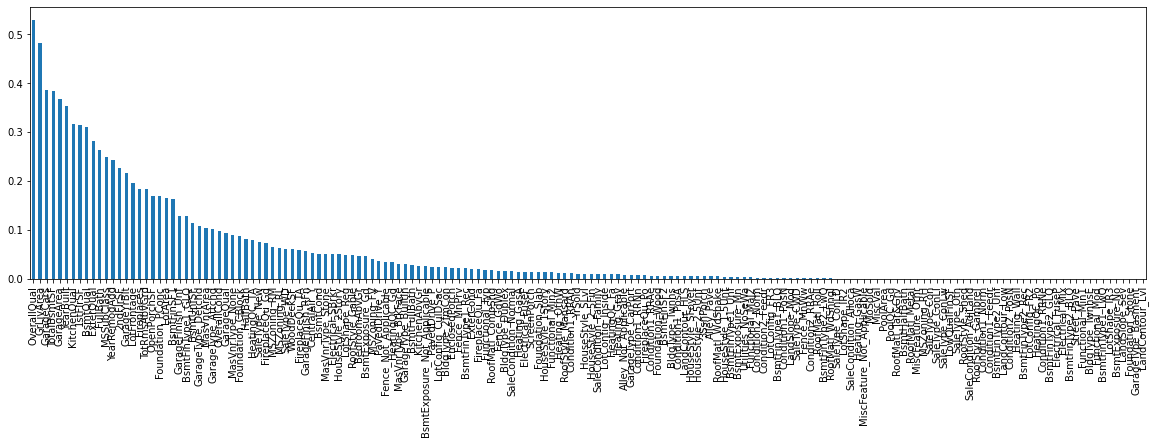

In [59]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,5))

In [60]:
from sklearn.feature_selection import SelectPercentile
select_top_percentile = SelectPercentile(mutual_info_regression, percentile=20)
select_top_percentile.fit(X_train, y_train)
top_percentile_cols = X_train.columns[select_top_percentile.get_support()]

print(top_percentile_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'OpenPorchSF', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtFinType1_GLQ', 'FireplaceQu_Gd', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Unf', 'SaleType_New'],
      dtype='object')


In [61]:
X_train_fs = X_train[top_percentile_cols]
X_valid_fs = X_valid[top_percentile_cols]
test_fs = test[top_percentile_cols]

In [62]:
# summarize
print('Train', X_train_fs.shape, y_train.shape)
print('Validation', X_valid_fs.shape, y_valid.shape)
print('Test', test_fs.shape)

Train (1021, 34) (1021,)
Validation (438, 34) (438,)
Test (1459, 34)


# Model Building

In [63]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# A parameter grid for XGBoost
params = {
    'n_estimators':[200*i for i in range(1,10)],
    'min_child_weight':[1,3,4,5,6,7,9],
    'gamma':[0.1*i for i in range(1,10)],  
    'subsample':[0.1*i for i in range(6,11)],
    'colsample_bytree':[0.1*i for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [0.1*i for i in range(3,6)],
}

regressor = XGBRegressor()
#RandomizedSearchCV
random_search = RandomizedSearchCV(regressor, param_distributions=params,n_iter=5, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')

random_search.fit(X_train_fs, y_train)


[17:29:30] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                        'gamma': [0.1, 0.2, 0.30000000000000004,
                                                  0.4, 0.5, 0.6000000000000001,
                              

In [64]:
best_regressor = random_search.best_estimator_
print(best_regressor)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.6000000000000001,
             enable_categorical=False, eta=0.30000000000000004,
             eval_metric='rmse', gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints=None, learning_rate=0.5,
             max_delta_step=None, max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints=None, n_estimators=1400, n_jobs=4,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=1.0,
             tree_method=None, validate_parameters=1, verbosity=None)


In [65]:
from sklearn.metrics import mean_absolute_error
# Get predictions
y_pred = best_regressor.predict(X_valid_fs)

In [66]:
# Calculate MAE
rmse_pred = mean_absolute_error(y_valid, y_pred) 
print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 147.40677886251802


In [67]:
'''from sklearn.model_selection import GridSearchCV'''
random_search.best_params_

{'subsample': 1.0,
 'objective': 'reg:squarederror',
 'n_estimators': 1400,
 'min_child_weight': 4,
 'max_depth': 7,
 'gamma': 0.1,
 'eval_metric': 'rmse',
 'eta': 0.30000000000000004,
 'colsample_bytree': 0.6000000000000001,
 'booster': 'gblinear'}

In [68]:
# A parameter grid for XGBoost
'''params = {
    'n_estimators':[random_search.best_params_['n_estimators']-100,random_search.best_params_['n_estimators']-50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators']+50, random_search.best_params_['n_estimators']+100],
    'min_child_weight':[random_search.best_params_['min_child_weight'], random_search.best_params_['min_child_weight']+1, random_search.best_params_['min_child_weight']+2, random_search.best_params_['min_child_weight']+3],
    'gamma':[random_search.best_params_['gamma']],  
    'subsample':[random_search.best_params_['subsample']-0.05, random_search.best_params_['subsample'], random_search.best_params_['subsample']+0.05],
    'colsample_bytree':[random_search.best_params_['colsample_bytree']], 
    'max_depth': [random_search.best_params_['max_depth'], random_search.best_params_['max_depth']+1, random_search.best_params_['max_depth']+2],
    'objective': [random_search.best_params_['objective']],
    'booster': [random_search.best_params_['booster']],
    'eval_metric': [random_search.best_params_['eval_metric']],
    'eta': [random_search.best_params_['eta']],
}

print(params)'''

"params = {\n    'n_estimators':[random_search.best_params_['n_estimators']-100,random_search.best_params_['n_estimators']-50, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators']+50, random_search.best_params_['n_estimators']+100],\n    'min_child_weight':[random_search.best_params_['min_child_weight'], random_search.best_params_['min_child_weight']+1, random_search.best_params_['min_child_weight']+2, random_search.best_params_['min_child_weight']+3],\n    'gamma':[random_search.best_params_['gamma']],  \n    'subsample':[random_search.best_params_['subsample']-0.05, random_search.best_params_['subsample'], random_search.best_params_['subsample']+0.05],\n    'colsample_bytree':[random_search.best_params_['colsample_bytree']], \n    'max_depth': [random_search.best_params_['max_depth'], random_search.best_params_['max_depth']+1, random_search.best_params_['max_depth']+2],\n    'objective': [random_search.best_params_['objective']],\n    'booster': [ran

In [69]:
'''regressor = XGBRegressor()
grid_search =  GridSearchCV(estimator=regressor, param_grid=params, cv=5, n_jobs=-1,verbose=0, scoring='neg_mean_squared_error')

grid_search.fit(X_train_fs, y_train)'''

"regressor = XGBRegressor()\ngrid_search =  GridSearchCV(estimator=regressor, param_grid=params, cv=5, n_jobs=-1,verbose=0, scoring='neg_mean_squared_error')\n\ngrid_search.fit(X_train_fs, y_train)"

In [70]:
preds_test = best_regressor.predict(test_fs)

# Save test predictions to file
output = pd.DataFrame({'Id': test_fs.index+1461,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)